# Regresión lineal: método de gradiente descendente

Supongamos que eres el CEO de una franquicia de restaurantes y estás considerando varias ciudades para abrir una nueva sucursal. La cadena de restaurantes ya tiene sucursales en varias ciudades y se tiene datos de ganancias y cantidad de habitantes de cada ciudad. Estas pensando en usar estos datos para ayudarte a seleccionar en que ciudad expandirte proximamente.

La primer columna de los datos corresponde a la cantidad de habitantes de la ciudad y la segunda columna corresponde a las ganancias de una sucursal en esa ciudad. Un valor negativo de ganancias indica una pérdida.

#### Tamaño de gráficos

In [47]:
options(repr.plot.width=6, repr.plot.height=4, scipen = 999)

#### Instalación y carga de paquetes necesarios

In [37]:
list.of.packages <- c('ggplot2', 'gridExtra')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cran.r-project.org")

library(ggplot2)
library(gridExtra)
library(IRdisplay)

package 'IDPmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpiE32Q5\downloaded_packages


Loading required package: grid
Loading required package: lattice


#### Carga de datos

In [4]:
foodtruck <- read.table(file = 'foodtruck.txt', header = TRUE, 
                        col.names = c('population', 'profit'), sep = ",", dec = ".")

## Exploración inicial

### Exploramos tipos y estructuras de datos del dataset

In [5]:
head(foodtruck)

population,profit
5.5277,9.1302
8.5186,13.6620
7.0032,11.8540
5.8598,6.8233
8.3829,11.8860
7.4764,4.3483


In [6]:
str(foodtruck)

'data.frame':	96 obs. of  2 variables:
 $ population: num  5.53 8.52 7 5.86 8.38 ...
 $ profit    : num  9.13 13.66 11.85 6.82 11.89 ...


### Exploramos algunas estadísticas básicas

In [7]:
summary(foodtruck)

   population         profit      
 Min.   : 5.027   Min.   :-2.681  
 1st Qu.: 5.691   1st Qu.: 1.953  
 Median : 6.736   Median : 4.455  
 Mean   : 8.181   Mean   : 5.717  
 3rd Qu.: 8.640   3rd Qu.: 6.879  
 Max.   :22.203   Max.   :24.147  

## Visualizaciones

### Gráfico de cajas

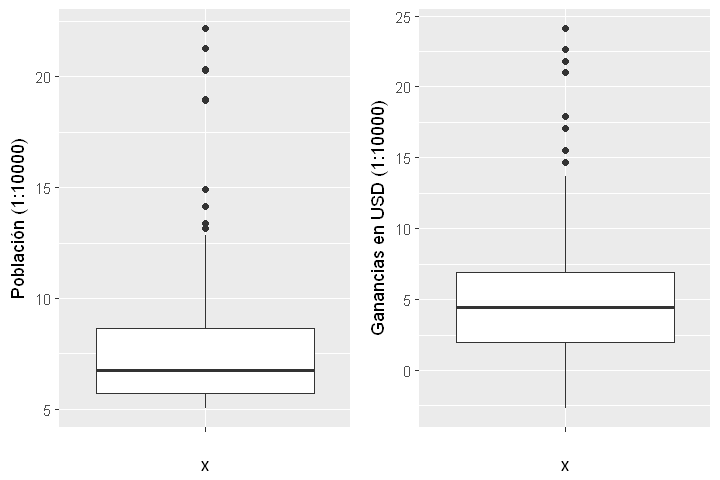

In [8]:
plot1 <- ggplot(foodtruck, aes(x = "", y= population)) + geom_boxplot() + labs(y = "Población (1:10000)")
plot2 <- ggplot(foodtruck, aes(x = "", y= profit)) + geom_boxplot() + labs(y = 'Ganancias en USD (1:10000)')
grid.arrange(plot1, plot2, ncol = 2)

### Gráfico de dispersión

`geom_smooth()` using method = 'loess'


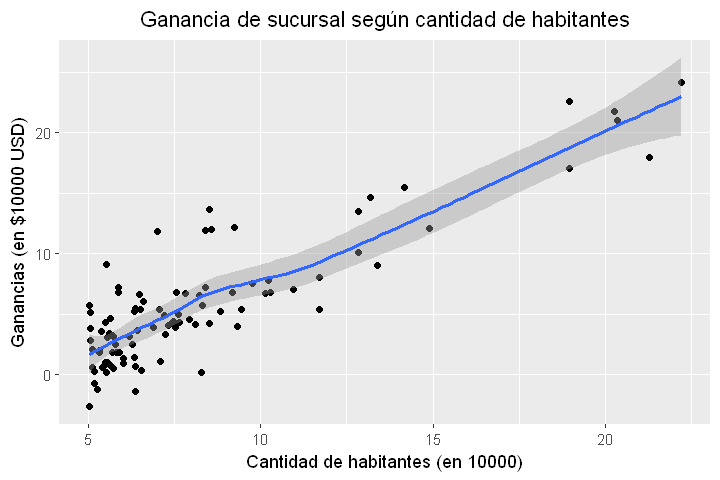

In [9]:
ggplot(data = foodtruck, aes(x = population, y = profit)) + geom_point() +
    labs(x = 'Cantidad de habitantes (en 10000)', y = 'Ganancias (en $10000 USD)') +
    ggtitle('Ganancia de sucursal según cantidad de habitantes') +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_smooth()

A simple vista se ve una clara relación lineal entre ambos atributos por ello vamos a realizar una regresión lineal y en este caso lo haremos por el método del gradiente descendente.
Tenemos que encontrar la recta que mejor se ajuste a los puntos minimizando el error entre las observaciones actuales y las predicciones teniendo en cuenta una función de costo.

#### Extraemos las variables predictoras (X) y a predecir (y)

In [10]:
X <- foodtruck$population
y <- foodtruck$profit

#### Agregamos una columna de 1's (para el coeficiente de intersección)

In [11]:
X <- cbind(1,X)

#### Función de costos, lo calcularemos en cada iteración (buscamos minimizar este valor)

In [12]:
computeCost <- function(X, y, theta) {
  
  sum( (X %*% theta - y) ^2 ) / (2 * m)
}

#### Calculamos el valor de los coeficientes para cada iteración

In [157]:
m <- nrow(X)

computeTheta <- function(alpha, iterations) {
    
    theta <- matrix(c(0, 0), nrow = 2, ncol = 1)
    historic_cost <- vector('numeric')
    historic_theta <- vector('numeric')
    
    
    for (i in 1:iterations) {

        theta <- theta - (alpha / m) * (t(X) %*% (X %*% theta - y))
        J <- computeCost(X, y, theta)
        
        if(!is.finite(J) | J > 9999) {
            J <- 9999
        }
        historic_cost <- append(historic_cost, J)
        historic_theta <- rbind(historic_theta, t(theta))
    }
    list(historic_cost = historic_cost, theta = theta, historic_theta = historic_theta)
}

### Funcion de costo vs. Número de iteraciones

In [158]:
iter <- 10000
alpha1 <- 0.00001
alpha2 <- 0.0001
alpha3 <- 0.001
alpha4 <- 0.01
alpha5 <- 0.1
alpha6 <- 1

historic_cost1 <- computeTheta(alpha1, iter)$historic_cost
historic_cost2 <- computeTheta(alpha2, iter)$historic_cost
historic_cost3 <- computeTheta(alpha3, iter)$historic_cost
historic_cost4 <- computeTheta(alpha4, iter)$historic_cost
historic_cost5 <- computeTheta(alpha5, iter)$historic_cost
historic_cost6 <- computeTheta(alpha6, iter)$historic_cost

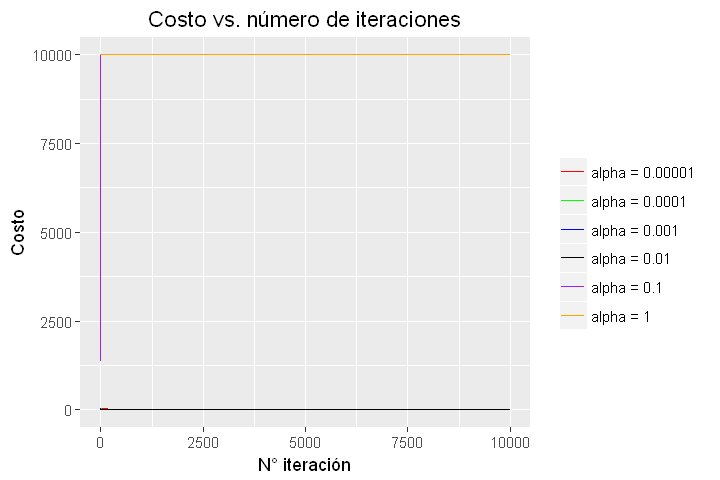

In [160]:
ggplot() + 
    geom_line(aes(x = 1:iter, y = historic_cost1, colour = 'alpha = 0.00001')) +
    geom_line(aes(x = 1:iter, y = historic_cost2, colour = 'alpha = 0.0001')) +
    geom_line(aes(x = 1:iter, y = historic_cost3, colour = 'alpha = 0.001')) +
    geom_line(aes(x = 1:iter, y = historic_cost4, colour = 'alpha = 0.01')) +
    geom_line(aes(x = 1:iter, y = historic_cost5, colour = 'alpha = 0.1')) +
    geom_line(aes(x = 1:iter, y = historic_cost6, colour = 'alpha = 1')) +
    scale_colour_manual("", 
                      breaks = c("alpha = 0.00001", "alpha = 0.0001", "alpha = 0.001", 
                                 'alpha = 0.01', 'alpha = 0.1', 'alpha = 1'),
                      values = c("red", "green", "blue", 'black', 'purple', 'orange')) +
    labs(x = 'N° iteración', y = 'Costo') +
    ggtitle('Costo vs. número de iteraciones') + theme(plot.title = element_text(hjust = 0.5))

Como podemos ver el costo con alpha = 0.1 o alpha = 1 se hace extrmadamente altas (en este caso hicimos que el costo sea 9999 si supera ese valor).
Volvamos a graficar si usar esos valores de alpha.

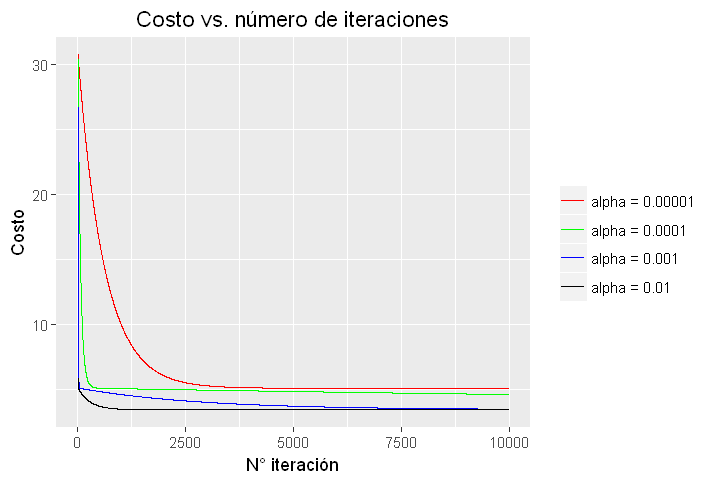

In [101]:
ggplot() + 
    geom_line(aes(x = 1:iter, y = historic_cost1, colour = 'alpha = 0.00001')) +
    geom_line(aes(x = 1:iter, y = historic_cost2, colour = 'alpha = 0.0001')) +
    geom_line(aes(x = 1:iter, y = historic_cost3, colour = 'alpha = 0.001')) +
    geom_line(aes(x = 1:iter, y = historic_cost4, colour = 'alpha = 0.01')) +
    scale_colour_manual("", 
                      breaks = c("alpha = 0.00001", "alpha = 0.0001", "alpha = 0.001", 'alpha = 0.01'),
                      values = c("red", "green", "blue", 'black')) +
    labs(x = 'N° iteración', y = 'Costo') +
    ggtitle('Costo vs. número de iteraciones') + theme(plot.title = element_text(hjust = 0.5))

Podemos observar:
1. alpha = 0.00001, el costo decrece muy lentamente hasta estabilizarse. Se empieza a estabilizar aproximadamente en la iteración 3000.
2. alpha = 0.0001, el costo se estabiliza rápidamente aproximadamente en la iteración 500. 
3. alpha = 0.001, el costo decrece abruptamente pero tarda más en estabilizarse que alpha = 0.0001. El costo comienza a ser más estable en la iteracion 5000 alcanzando un costo final más bajo que las opciones anteriores.
4. alpha = 0.01, el costo se comporta similar a alpha = 0.0001 pero alcanza un costo final más bajo.

Teniendo en cuenta las conclusiones anteriores para nuestro modelo utilizaremos alpha = 0.01 y 1000 iteraciones.

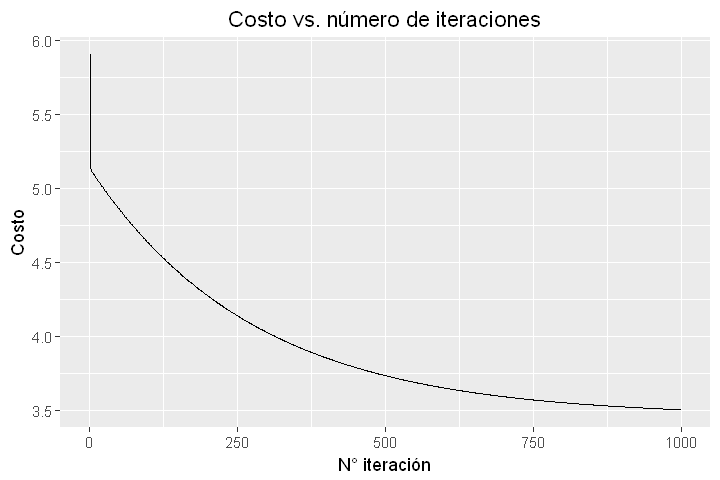

In [162]:
iter <- 1000
results <- computeTheta(alpha = 0.01, iterations = iter)
historic_cost <- results$historic_cost
historic_theta <- results$historic_theta
theta <- results$theta

ggplot() + geom_line(aes(x = 1:iter, y = historic_cost)) + labs(x = 'N° iteración', y = 'Costo') +
    ggtitle('Costo vs. número de iteraciones') + theme(plot.title = element_text(hjust = 0.5))

Teniendo en cuenta el vector de costos podemos saber en que iteración el costo solo disminuyó, por ejemplo, en un 0.0009 que podría ser nuestro criterio de parada.

In [163]:
umbral <- round(-diff(historic_cost), 5)
min(which(umbral < 0.0009))

[1] 529

Para la iteración 529 nuestro gradiente ya comenzó a converger teniendo en cuenta el gráfico y el umbral.

## Convergencia de theta#
Para este ejemplo podemos ver como evoluciona el valor de la ordenada al origen (theta0) a medida que el costo disminuye. 
El gráfico lo leemos de derecha a izquierda.

Theta0 inicialmente vale cero y a medida que baja el costo el valor de Theta va disminuyendo.

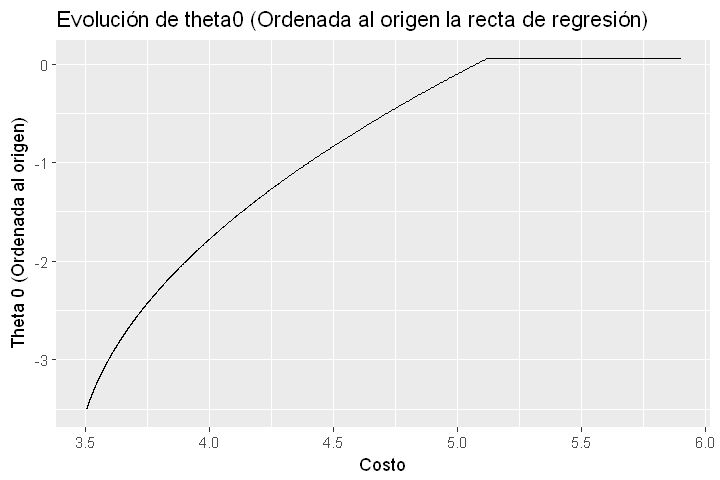

In [166]:
ggplot() + geom_line(aes(x = historic_cost, y = historic_theta[,1])) + labs(y = "Theta 0 (Ordenada al origen)", 
                                                                                     x = "Costo") +
    ggtitle("Evolución de theta0 (Ordenada al origen la recta de regresión)")

Tambien podemos ver como evoluciona el valor de la pendiente (theta1) a medida que baja el costo.

El gráfico lo leemos de derecha a izquierda. A medida que el costo baja el valor de la pendiente tiende a 1.1

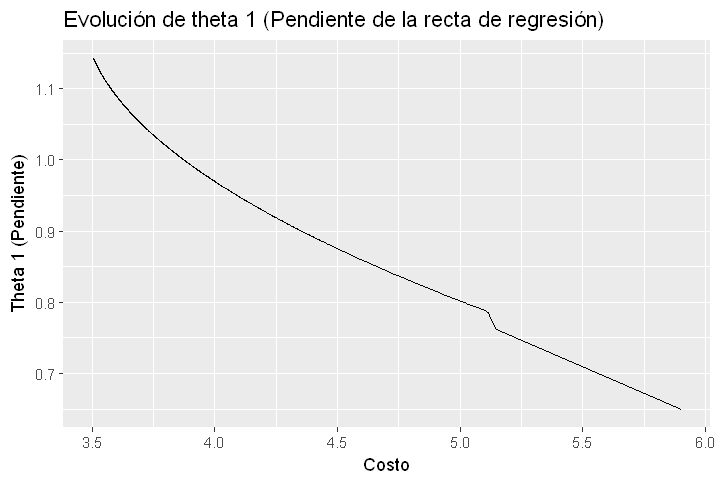

In [174]:
ggplot() + geom_line(aes(x = historic_cost, y = historic_theta[,2])) + labs(y = "Theta 1 (Pendiente)", x= "Costo") +
    ggtitle("Evolución de theta 1 (Pendiente de la recta de regresión)")

Y finalmente podemos ver el costo en función de theta0 y theta1.
Comienza en lo alto del gráfico con un punto aislado que es theta0 = 0 y theta1 = 0 y rápidamente comienza a descender theta0 y a incrementarse theta1 hasta alcanzar el costo mínimo.

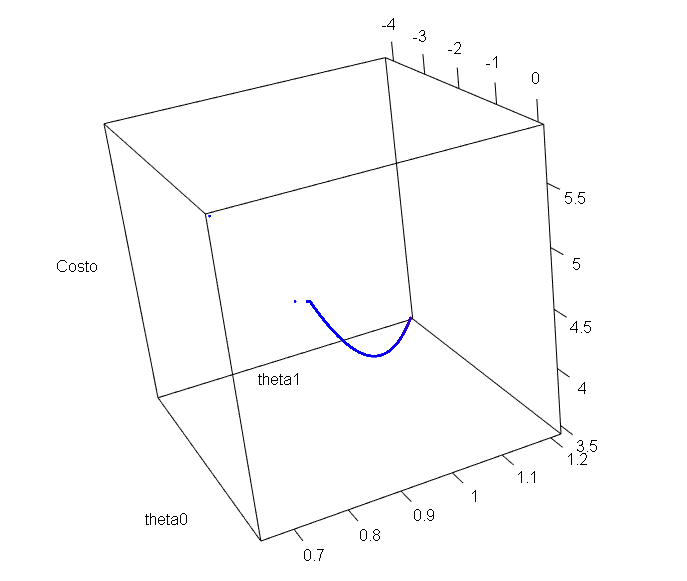

In [169]:
display_png(file='costo.png') 

Teniendo en cuenta el último caso los valores de theta o coeficientes resultantes son:

In [170]:
cat("Intersección: ", theta[1], "\nPendiente: ", theta[2])
cat("\nCosto: ", tail(historic_cost,1))

Intersección:  -3.507705 
Pendiente:  1.143056
Costo:  3.504757

Por lo tanto la recta que ajustará mejor a nuestros datos será:

In [171]:
cat('y = ', theta[1], " + ", theta[2], "x")

y =  -3.507705  +  1.143056 x

Finalmente graficamos los puntos y la recta de regresión correspondiente.

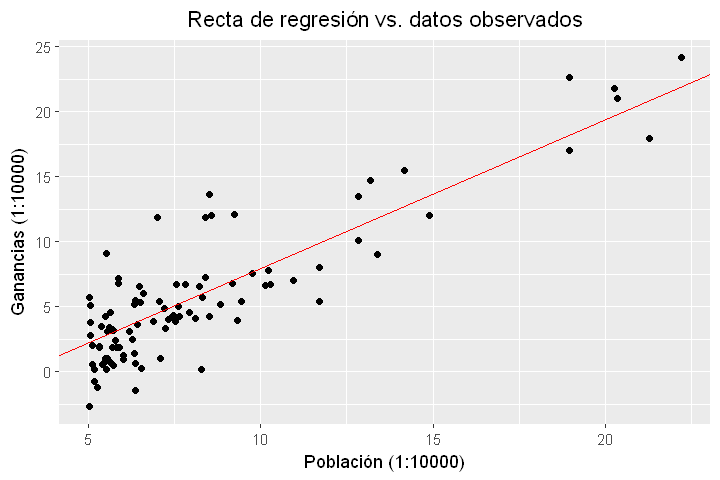

In [173]:
ggplot(foodtruck, aes(population, profit)) + geom_point() + 
    geom_abline(intercept = theta[1], slope = theta[2], col = "red") + 
    labs(x = "Población (1:10000)", y = "Ganancias (1:10000)") +
    ggtitle("Recta de regresión vs. datos observados") +
    theme(plot.title = element_text(hjust = 0.5))

### Conclusiones:
1. Se necesita establecer diferentes valores de alpha y ver como varía el costo.
2. Necesita varias iteraciones.
3. No requiere mucho costo computacional O(kn^2)
4. Funciona bien cuando el número de atributos es grande (a partir de 10.000 atributos es conviente este método antes que la resolución por ecuaciones normales).